In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

# style = np.random.choice(plt.style.available)
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('kaggle_survey_2021.csv')
df.shape

(16126, 21)

In [3]:
df.head()

,Age Group,Gender,Country,Education Level,Recent Job Title,Coding Experience,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,Industry,Company Size,Data Science Employees,Average Annual Salary ($USD)
0,50-54,Man,India,Bachelor’s degree,Other,5-10,1,1,0,0,0,0,0,0,0,0,0,Manufacturing/Fabrication,50-249,3-4,27499.5
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+,0,0,1,1,1,1,0,0,0,0,0,Manufacturing/Fabrication,"1000-9,999",1-2,64999.5
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3,1,0,0,0,1,1,0,0,0,0,0,Academics/Education,"1000-9,999",0,499.5
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+,1,0,0,0,0,0,0,0,0,0,0,Academics/Education,"1000-9,999",0,34999.5
4,45-49,Man,India,Doctoral degree,Other,< 1,1,0,0,1,0,0,0,0,0,0,1,Academics/Education,50-249,5-9,34999.5


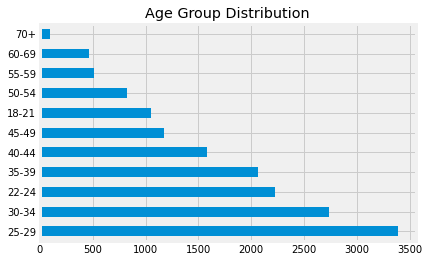

In [4]:
df['Age Group'].value_counts().plot(kind='barh')
plt.title('Age Group Distribution')
plt.show()

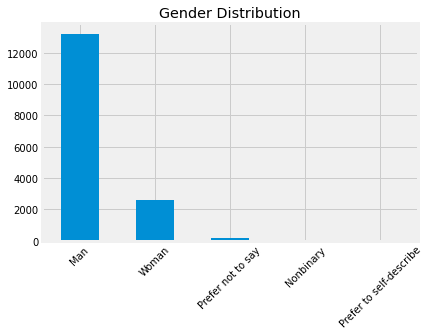

In [5]:
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()

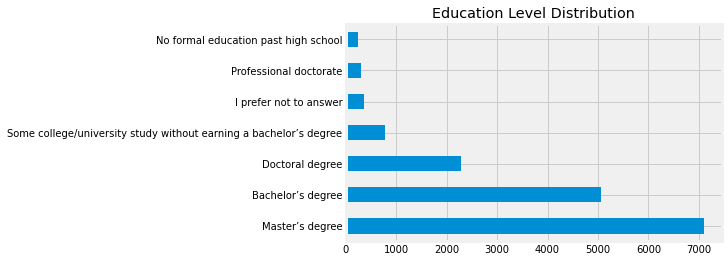

In [6]:
df['Education Level'].value_counts().plot(kind='barh')
plt.title('Education Level Distribution')
plt.show()

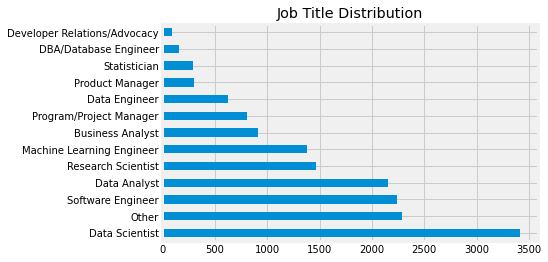

In [7]:
df['Recent Job Title'].value_counts().plot(kind='barh')
plt.title('Job Title Distribution')
plt.show()

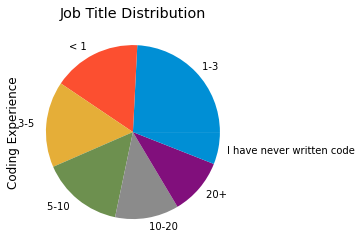

In [8]:
df['Coding Experience'].value_counts().plot(kind='pie')
plt.title('Job Title Distribution')
plt.show()

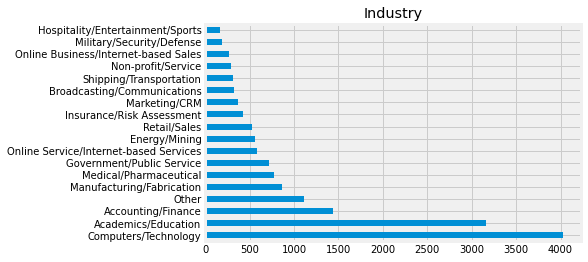

In [9]:
df['Industry'].value_counts().plot(kind='barh')
plt.title('Industry')
plt.show()

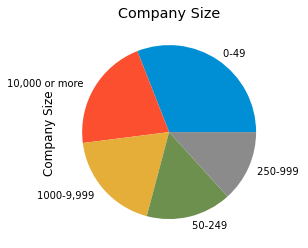

In [10]:
df['Company Size'].value_counts().plot(kind='pie')
plt.title('Company Size')
plt.show()

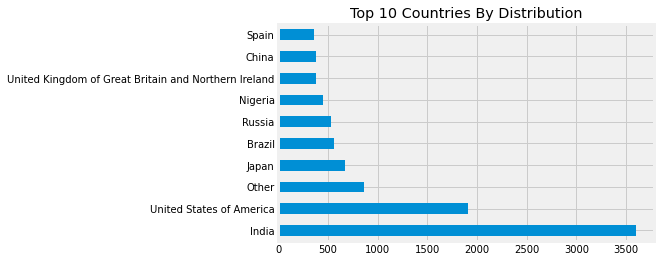

In [11]:
df['Country'].value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 Countries By Distribution')
plt.show()

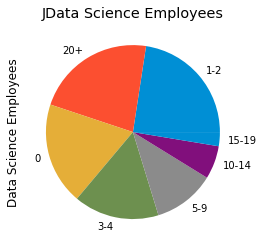

In [12]:
df['Data Science Employees'].value_counts().plot(kind='pie')
plt.title('JData Science Employees')
plt.show()

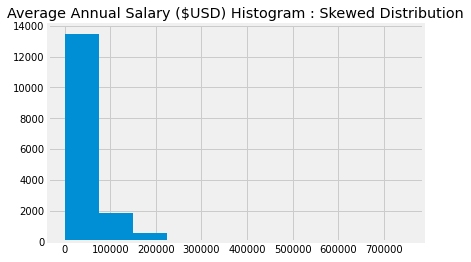

In [13]:
plt.hist(data=df, x = 'Average Annual Salary ($USD)')
plt.title('Average Annual Salary ($USD) Histogram : Skewed Distribution')
plt.show()

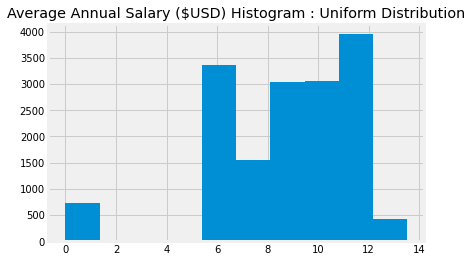

In [14]:
plt.hist( x = np.log1p(df['Average Annual Salary ($USD)']))
plt.title('Average Annual Salary ($USD) Histogram : Uniform Distribution')
plt.show()

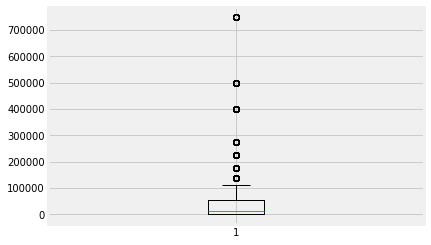

In [15]:
plt.boxplot(df['Average Annual Salary ($USD)'])
plt.show()

In [16]:
df = df[df['Average Annual Salary ($USD)'] <= 85000]

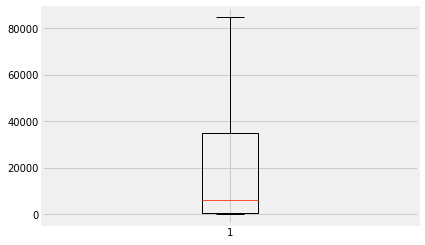

In [17]:
plt.boxplot(df['Average Annual Salary ($USD)'])
plt.show()

In [18]:
corr = (
    df.corr()['Average Annual Salary ($USD)']
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'index':'feature'})
    .iloc[1:,:]
)

corr

,feature,Average Annual Salary ($USD)
1,Bash,0.130737
2,R,0.055061
3,SQL,0.051137
4,Julia,0.021873
5,Swift,0.012682
6,Python,0.004993
7,Javascript,-0.006350
8,Java,-0.044244
9,MATLAB,-0.049324
10,C,-0.064807


## Feature Engineering

In [19]:
df['Num Language'] = df.iloc[:, 6:17].sum(axis=1)

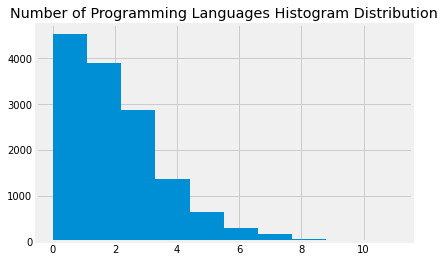

In [20]:
plt.hist(data=df, x = 'Num Language')
plt.title('Number of Programming Languages Histogram Distribution')
plt.show()

## Ordinal Encoding

In [21]:
edu_dict = {
    'Professional doctorate': 7,
    'Doctoral degree': 6,
    'Master’s degree': 5,
    'Bachelor’s degree': 4,
    'Some college/university study without earning a bachelor’s degree': 3,
    'No formal education past high school': 2,
    'I prefer not to answer': 1
}

df['Education Level'] = df['Education Level'].map(edu_dict)

In [22]:
code_dict = {
    '20+ ': 7,     
    '10-20 ': 6, 
    '5-10 ':5,
    '3-5 ': 4,
    '1-3 ': 3, 
    '< 1 ': 2, 
    'I have never written code': 1   
}

df['Coding Experience'] = df['Coding Experience'].map(code_dict)

In [23]:
company_dict = {
    '10,000 or more ': 5, 
    '1000-9,999 ': 4,
    '250-999 ': 3,
    '50-249 ': 2, 
    '0-49 ': 1
}

df['Company Size'] = df['Company Size'].map(company_dict)

In [24]:
employees_dict = {
    '20+': 7, 
    '15-19': 6,
    '10-14': 5, 
    '5-9': 4,
    '3-4': 3, 
    '1-2': 2,
    '0': 1,
}

df['Data Science Employees'] = df['Data Science Employees'].map(employees_dict)

In [25]:
df = df[['Age Group', 'Gender', 'Country', 'Education Level',
    'Recent Job Title','Coding Experience',
    'Python','R', 'SQL','C', 'C++', 'Java', 
    'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 
    'Num Language','Industry','Company Size', 
    'Data Science Employees','Average Annual Salary ($USD)']]

df.head()

,Age Group,Gender,Country,Education Level,Recent Job Title,Coding Experience,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,Num Language,Industry,Company Size,Data Science Employees,Average Annual Salary ($USD)
0,50-54,Man,India,4,Other,5,1,1,0,0,0,0,0,0,0,0,0,2,Manufacturing/Fabrication,2,3,27499.5
1,50-54,Man,Indonesia,5,Program/Project Manager,7,0,0,1,1,1,1,0,0,0,0,0,4,Manufacturing/Fabrication,4,2,64999.5
2,22-24,Man,Pakistan,5,Software Engineer,3,1,0,0,0,1,1,0,0,0,0,0,3,Academics/Education,4,1,499.5
3,45-49,Man,Mexico,6,Research Scientist,7,1,0,0,0,0,0,0,0,0,0,0,1,Academics/Education,4,1,34999.5
4,45-49,Man,India,6,Other,2,1,0,0,1,0,0,0,0,0,0,1,3,Academics/Education,2,4,34999.5


In [26]:
data = df.copy()

In [27]:
X = data.drop('Average Annual Salary ($USD)', axis=1)
y = data['Average Annual Salary ($USD)'].values

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
label_encoder = LabelEncoder()
categorical_cols = ['Age Group', 'Gender', 'Country', 'Recent Job Title', 'Industry']

for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])

In [31]:
X_train.head()

,Age Group,Gender,Country,Education Level,Recent Job Title,Coding Experience,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,Num Language,Industry,Company Size,Data Science Employees
13793,1,0,41,3,4,3,1,0,0,0,1,0,0,0,0,0,0,2,3,1,3
1797,8,0,30,4,11,6,1,0,0,0,0,0,0,0,0,0,0,1,3,4,2
7086,5,0,64,4,5,6,1,0,1,0,0,1,1,0,0,0,0,4,8,2,2
8188,6,0,23,1,9,5,0,0,0,0,0,0,1,0,0,0,0,1,15,5,7
10639,1,0,23,4,3,4,1,0,1,0,0,0,0,0,0,0,0,2,3,2,3


In [32]:
linear_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [33]:
linear_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
for col in categorical_cols:
    X_test[col] = label_encoder.fit_transform(X_test[col])

In [36]:
def evaluate_model(model):
    y_pred_train = model.predict(X_train)
    mean_squared_error_train = mean_squared_error(y_train, y_pred_train)
    mean_absolute_error_train = mean_absolute_error(y_train, y_pred_train)
    
    y_pred_test = model.predict(X_test)
    mean_squared_error_test = mean_squared_error(y_test, y_pred_test)
    mean_absolute_error_test = mean_absolute_error(y_test, y_pred_test)
    
    print(f'Training Error: ${np.sqrt(mean_squared_error_train)}')
    print('='*40)
    print(f'Testing  Error: ${np.sqrt(mean_squared_error_test)}')    


In [37]:
evaluate_model(linear_model)

Training Error: $21863.503596621173
Testing  Error: $21544.547065679675


In [38]:
dtr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(max_depth=7))
])

dtr_model.fit(X_train, y_train)

evaluate_model(dtr_model)

Training Error: $20221.08779337142
Testing  Error: $21851.22750190962


In [39]:
gbr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor())
])

gbr_model.fit(X_train, y_train)

evaluate_model(gbr_model)

Training Error: $19329.029695156365
Testing  Error: $20170.069677297524


In [40]:
rfr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(max_depth=4))
])

rfr_model.fit(X_train, y_train)

evaluate_model(rfr_model)

Training Error: $21270.082508240277
Testing  Error: $21708.382231615644


In [41]:
from xgboost import XGBRegressor

In [42]:
xgb_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor())
])

xgb_model.fit(X_train, y_train)

evaluate_model(xgb_model)

Training Error: $12546.652178297765
Testing  Error: $20370.759956969116


In [43]:
X.head()

,Age Group,Gender,Country,Education Level,Recent Job Title,Coding Experience,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,Num Language,Industry,Company Size,Data Science Employees
0,50-54,Man,India,4,Other,5,1,1,0,0,0,0,0,0,0,0,0,2,Manufacturing/Fabrication,2,3
1,50-54,Man,Indonesia,5,Program/Project Manager,7,0,0,1,1,1,1,0,0,0,0,0,4,Manufacturing/Fabrication,4,2
2,22-24,Man,Pakistan,5,Software Engineer,3,1,0,0,0,1,1,0,0,0,0,0,3,Academics/Education,4,1
3,45-49,Man,Mexico,6,Research Scientist,7,1,0,0,0,0,0,0,0,0,0,0,1,Academics/Education,4,1
4,45-49,Man,India,6,Other,2,1,0,0,1,0,0,0,0,0,0,1,3,Academics/Education,2,4


In [44]:
num_cols = ['Education Level', 'Coding Experience', 'Num Language','Company Size']
cat_cols = ['Age Group', 'Gender', 'Country', 'Recent Job Title', 'Industry']

In [45]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [47]:
pipe_num = Pipeline([
    ('scaler', StandardScaler()),
])

pipe_cat = Pipeline([
    ('encoder', OneHotEncoder()),
])

In [48]:
pipe_num['scaler']

StandardScaler()

In [50]:
pipe_cat['encoder']

OneHotEncoder()

In [51]:
model = Pipeline([
    ('selector', ColumnTransformer([
        ('numerical', pipe_num, num_cols),
        ('categorical', pipe_cat, cat_cols),
    ])),
    ('classifier', XGBRegressor())
])

In [52]:
model.fit(Xtrain, ytrain)

Pipeline(steps=[('selector',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Education Level',
                                                   'Coding Experience',
                                                   'Num Language',
                                                   'Company Size']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Age Group', 'Gender',
                                                   'Country',
                                                   'Recent Job Title',
                            

In [53]:
def model_eval(model):
    y_pred_train = model.predict(Xtrain)
    mean_squared_error_train = mean_squared_error(ytrain, y_pred_train)
    mean_absolute_error_train = mean_absolute_error(ytrain, y_pred_train)
    
    y_pred_test = model.predict(Xtest)
    mean_squared_error_test = mean_squared_error(ytest, y_pred_test)
    mean_absolute_error_test = mean_absolute_error(ytest, y_pred_test)
    
    print(f'Training Error: ${np.sqrt(mean_squared_error_train) :,.02f}')
    print('='*40)
    print(f'Testing  Error: ${np.sqrt(mean_squared_error_test) :,.02f}') 

In [54]:
model_eval(model)

Training Error: $14,301.27
Testing  Error: $19,469.90


## Hyper Parameter Tuning

In [55]:
n_estimators = [i for i in range(0, 120, 20)]
max_depth = [i for i in range(1, 10, 2)]
gb_tree = [ 'gbtree', 'gblinear','dart']
tree_method = ['Default', 'auto']

In [56]:
param_grid = {
    'classifier__n_estimators':n_estimators,
    'classifier__max_depth':max_depth,
    'classifier__gb_tree':gb_tree,
    'classifier__tree_method':tree_method
}

In [57]:
grid_model = GridSearchCV(
        estimator = model,
        param_grid = param_grid,
        scoring = 'neg_mean_squared_error',
        n_jobs = 1,
        cv = 5,
        verbose = 1)

In [58]:
grid_model.fit(Xtrain, ytrain)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[14:28:36] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:28:36] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:28:36] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XG

[14:28:44] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:28:45] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:28:46] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:28:54] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:28:54] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:28:54] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:29:03] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:29:04] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:29:04] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:29:16] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:29:17] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:29:17] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:29:29] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:29:30] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:29:31] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:29:40] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:29:41] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:29:42] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:29:52] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:29:52] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:29:53] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:30:02] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:30:02] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:30:02] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:30:13] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:30:13] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:30:13] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:30:21] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:30:22] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:30:22] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:30:31] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:30:32] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:30:32] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:30:44] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:30:44] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:30:44] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:31:00] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:31:00] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:31:01] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:31:10] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:31:10] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:31:11] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:31:18] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:31:18] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:31:19] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:31:27] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:31:27] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:31:28] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:31:38] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:31:39] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:31:39] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:31:52] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:31:53] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:31:53] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[14:32:03] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:32:04] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:32:05] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selector',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Education '
                                                                          'Level',
                                                                          'Coding '
                                                                          'Experience',
                                                                          'Num '
                                                                          'Language',
                                                                          'Company '
                                      

In [59]:
grid_model.best_params_

{'classifier__gb_tree': 'gbtree',
 'classifier__max_depth': 3,
 'classifier__n_estimators': 100,
 'classifier__tree_method': 'auto'}

In [60]:
grid_model.best_estimator_.fit(Xtrain, ytrain)

[14:32:12] WARNING: ../src/learner.cc:576: 
Parameters: { "gb_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('selector',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Education Level',
                                                   'Coding Experience',
                                                   'Num Language',
                                                   'Company Size']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Age Group', 'Gender',
                                                   'Country',
                                                   'Recent Job Title',
                            

In [61]:
model_eval(grid_model)

Training Error: $18,204.41
Testing  Error: $19,103.32


In [62]:
import pickle

In [63]:
data = {
        'model' : grid_model, 
        'edu_dict' : edu_dict, 
        'code_dict' : code_dict, 
        'company_dict' : company_dict, 
        'employees_dict' : employees_dict,
        'label_encoder':label_encoder,
        'numeric_cols': num_cols,
        'categorical_cols': cat_cols,
        'onehot_encoder':pipe_cat['encoder'],
        'scaler':pipe_num['scaler'],
       }

with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)